In [2]:
import http.client
import json
import datetime
import pandas as pd
import matplotlib.pyplot as plt
today_date = datetime.date.today().strftime("%Y-%m-%d")

In [3]:
def get_stocks():
    conn = http.client.HTTPSConnection("apidojo-yahoo-finance-v1.p.rapidapi.com")

    headers = {
        'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
        'x-rapidapi-key': "5d79aadd91msh6e2014127ab2d99p15695djsn9d67a28ba3ed"
    }
    conn.request("GET", "/stock/v3/get-historical-data?region=US&symbol=TSLA", headers=headers)

    res = conn.getresponse()
    data = res.read()

    with open(f'data/tesla_stock_historical_{today_date}.json', 'w') as out:
        out.write(data.decode("utf-8")+'\n')

    print("\nStreaming completed\n")

In [4]:
get_stocks()


Streaming completed



In [5]:
# json_file_path = f'./data/tesla_stock_historical.json'
json_file_path = f'./data/tesla_stock_historical_{today_date}.json'

with open(json_file_path, 'r') as j:
     stock_dict = json.loads(j.read())

In [6]:
stock_dict.keys()

dict_keys(['prices', 'isPending', 'firstTradeDate', 'id', 'timeZone', 'eventsData'])

In [7]:
def unix2date(unixdate):
    date = datetime.datetime.fromtimestamp(int(unixdate)).strftime('%Y-%m-%d')
    return date

In [12]:
stocks_df = pd.DataFrame.from_dict(stock_dict['prices'])
stocks_df['time_stamp'] = stocks_df.apply(lambda row : unix2date(row.date), axis=1)
stocks_df.drop(['numerator','denominator','splitRatio','type','data'], axis=1,inplace=True)

In [13]:
stocks_df.head()

,date,open,high,low,close,volume,adjclose,time_stamp
0,1604673000,436.100006,436.570007,424.279999,429.950012,21653600.0,429.950012,2020-11-06
1,1604586600,428.299988,440.000000,424.000000,438.089996,28414500.0,438.089996,2020-11-05
2,1604500200,430.619995,435.399994,417.100006,420.980011,32143100.0,420.980011,2020-11-04
3,1604413800,409.730011,427.769989,406.690002,423.899994,34351700.0,423.899994,2020-11-03
4,1604327400,394.000000,406.980011,392.299988,400.510010,29021100.0,400.510010,2020-11-02


In [14]:
# stocks_df = stocks_df.set_index('time_stamp')

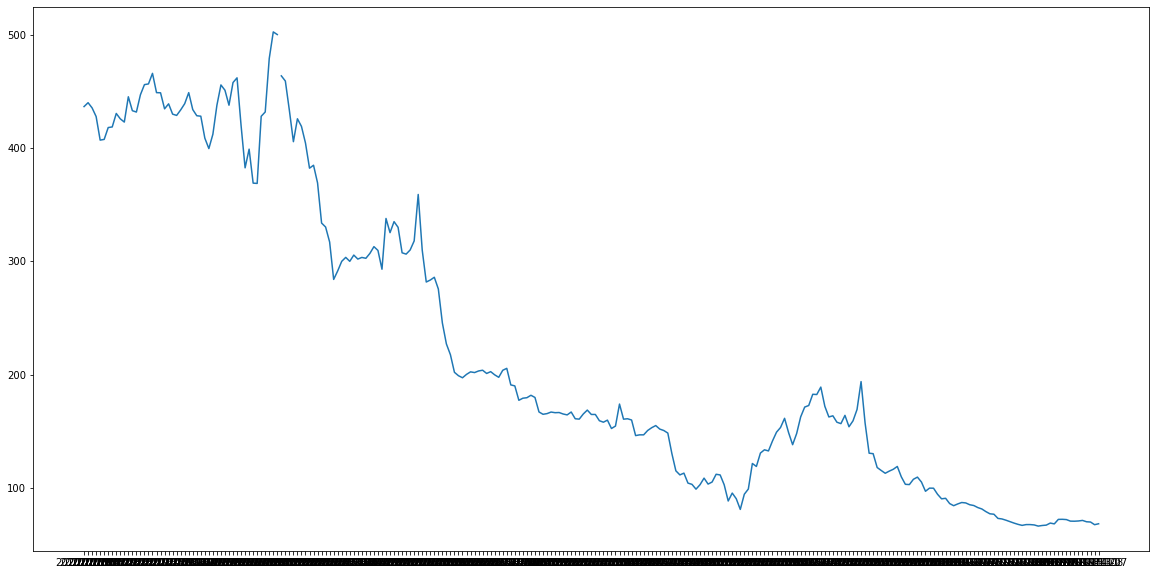

In [15]:
fig, axs = plt.subplots(1,1, figsize=(20,10))
# axs[0].plot(stocks_df['time_stamp'],stocks_df['high'])
axs.plot(stocks_df['time_stamp'],stocks_df['high'])
# stocks_df['high'].plot(kind='line', ax=axs[0,0])
# stocks_df['low'].plot(kind='line', ax=axs[0,1])
# stocks_df['open'].plot(kind='line', ax=axs[1,0])
# stocks_df['close'].plot(kind='line', ax=axs[1,1])
plt.show()